In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [3]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [4]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
ybound = 2e5

In [5]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

In [6]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

ybound = 5e5

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


# hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
# hist01.load()


vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')

# hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'], bins=[vortband01,strainband01])
# hist05.load()


vort_20_0 = (vort20_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_20_0 = (abs(strain20_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


# hist20 = histogram(vort_20_0,strain_20_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
# hist20.load()


In [7]:
girbNums01 = vort_01_0.XC.size*vort_01_0.YC.size
girbNums05 = vort_05_0.XC.size*vort_05_0.YC.size
girbNums20 = vort_20_0.XC.size*vort_20_0.YC.size

In [15]:
### data from fig4.ipynb

hist01 = xr.open_dataarray('hist01')
hist05 = xr.open_dataarray('hist05')
hist20 = xr.open_dataarray('hist20')

In [9]:
depth = -50
W01_50 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))


depth = -100
W01_100 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))


depth = -75
W05_75 = grid05.interp(ds05.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))

depth = -150
W05_150 = grid05.interp(ds05.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))


depth = -90
W20_90 = grid20.interp(ds20.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))

depth = -180
W20_180 = grid20.interp(ds20.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))


In [10]:
depth = -250
W01_250 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))

W05_250 = grid05.interp(ds05.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))

W20_250 = grid20.interp(ds20.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))


In [11]:

W01_50.rename('W1_50')
W01_100.rename('W1_100')
W01_250.rename('W1_250')
vort_01_0 = vort_01_0.chunk({'XC': 2000, 'YC': 2000})
strain_01_0 = strain_01_0.chunk({'XC': 2000, 'YC': 2000})
hist01_w50 = histogram(vort_01_0,strain_01_0,weights=W01_50, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist01_w100 = histogram(vort_01_0,strain_01_0,weights=W01_100, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist01_w250 = histogram(vort_01_0,strain_01_0,weights=W01_250, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist01_w50.load()
hist01_w100.load()
hist01_w250.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.00126133,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.00081112,
         -0.00075667,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00085888],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * time           (time) timedelta64[ns] 550 days 560 days ... 890 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [12]:

W05_75.rename('W5_75')
W05_150.rename('W5_150')
W05_250.rename('W5_250')
vort_05_0 = vort_05_0.chunk({'XC': 2000, 'YC': 2000})
strain_05_0 = strain_05_0.chunk({'XC': 2000, 'YC': 2000})
hist05_w75 = histogram(vort_05_0, strain_05_0, weights=W05_75, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05_w150 = histogram(vort_05_0, strain_05_0, weights=W05_150, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05_w250 = histogram(vort_05_0, strain_05_0, weights=W05_250, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05_w75.load()
hist05_w150.load()
hist05_w250.load()



<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 36010 days 06:00:00 ... 36350 days ...
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [13]:
W20_90.rename('W20_90')
W20_180.rename('W20_180')
W20_250.rename('W20_250')
vort_20_0 = vort_20_0.chunk({'XC': 2000, 'YC': 2000})
strain_20_0 = strain_20_0.chunk({'XC': 2000, 'YC': 2000})
hist20_w90 = histogram(vort_20_0, strain_20_0, weights=W20_90, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist20_w180 = histogram(vort_20_0, strain_20_0, weights=W20_180, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist20_w250 = histogram(vort_20_0, strain_20_0, weights=W20_250, dim = ['XC','YC'], bins=[vortband01,strainband01])
hist20_w90.load()
hist20_w180.load()
hist20_w250.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [18]:
vortband01new = np.linspace(-7, 7, 70)
strainband01new  = np.linspace(.5e-3, 7, 70)


binbox01new  =  (vortband01new[1]-vortband01new[0])*(strainband01new[1]-strainband01new[0])


W01_50.rename('W1_50')
W01_100.rename('W1_100')
W01_250.rename('W1_250')
vort_01_0 = vort_01_0.chunk({'XC': 2000, 'YC': 2000})
strain_01_0 = strain_01_0.chunk({'XC': 2000, 'YC': 2000})
hist01_w50 = histogram(vort_01_0,strain_01_0,weights=W01_50, dim = ['XC','YC'], bins=[vortband01new,strainband01new])
hist01_w100 = histogram(vort_01_0,strain_01_0,weights=W01_100, dim = ['XC','YC'], bins=[vortband01new,strainband01new])
hist01_w250 = histogram(vort_01_0,strain_01_0,weights=W01_250, dim = ['XC','YC'], bins=[vortband01new,strainband01new])
hist01_w50.load()
hist01_w100.load()
hist01_w250.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 69, strain1_0_bin: 69)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.00230308,
          0.00121813, -0.000137  ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.00064355],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.00126133]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ..., -0.00206589,
          0.        , -0.00434466],
        [ 0.        ,  0.        ,  0.        , ..., -0.00047973,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.00092492,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.0008405 ,
         -0.00239403,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.00066615,
         -0.00242435,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.00103272, -0.00242667]]])
Coordinates:
  * time           (time) timedelta64[ns] 550 days 560 days ... 890 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.899 -6.696 -6.493 ... 6.696 6.899
  * strain1_0_bin  (strain1_0_bin) float64 0.05122 0.1527 0.2541 ... 6.848 6.949

In [20]:
hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01new,strainband01new])
hist01.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 69, strain1_0_bin: 69)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 3, 3],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 1, 2],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 1, 6, 4],
        [0, 0, 0, ..., 1, 0, 5],
        [0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 2],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 1, 0],
        [0, 0, 0, ..., 2, 3, 0],
        [0, 0, 0, ..., 0, 1, 3]]])
Coordinates:
  * time           (time) timedelta64[ns] 550 days 560 days ... 890 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.899 -6.696 -6.493 ... 6.696 6.899
  * strain1_0_bin  (strain1_0_bin) float64 0.05122 0.1527 0.2541 ... 6.848 6.949

<ipython-input-21-9535868a752b>:10: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
<ipython-input-21-9535868a752b>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im00 = ax[0,0].pcolormesh(hist01.vort1_0_bin, hist01.strain1_0_bin, tempW0150,
<ipython-input-21-9535868a752b>:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im00 = ax[0,0].pcolormesh(hist01.vort1_0_bin, hist01.strain

(0.0, 1.0)

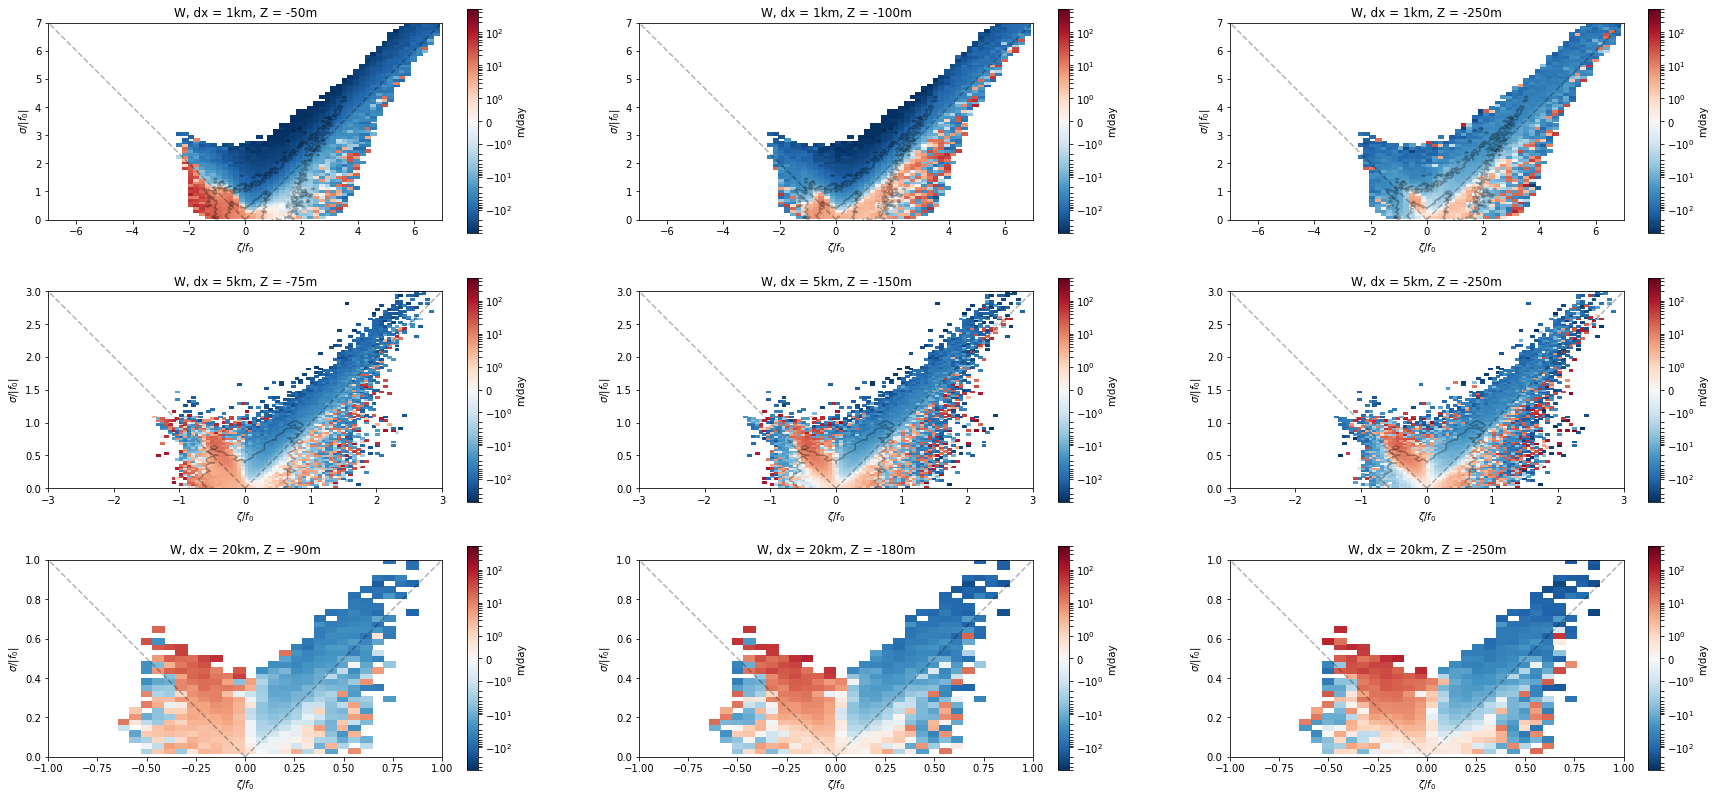

In [21]:
fig, ax = plt.subplots(3,3, figsize=(30,14))

### expected W
### 1km
filter01 = xr.where((1/(binbox01new*girbNums01)*hist01.mean(dim='time').T)>1e-5, 1, np.NaN)


tempW0150 = (86400*(hist01_w50/hist01).mean(dim='time').T)*filter01
im00 = ax[0,0].pcolormesh(hist01.vort1_0_bin, hist01.strain1_0_bin, tempW0150, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[0,0].set_xlabel('$\zeta/f_0$')
ax[0,0].set_ylabel('$\sigma/|f_0|$')
ax[0,0].set_aspect('equal')
ax[0,0].set_title('W, dx = 1km, Z = -50m')
h00 = fig.colorbar(im00, ax=ax[0,0])
h00.set_label('m/day')
ax[0,0].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,0].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums05)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,0].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[0,0].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[0,0].set_xlim(-7,7)
ax[0,0].set_ylim(0, 7)



tempW01100 = (86400*(hist01_w100/hist01).mean(dim='time').T)*filter01
# temp = xr.where(temp<1e-5,np.nan,temp)
im01 = ax[0,1].pcolormesh(hist01.vort1_0_bin, hist01.strain1_0_bin, tempW01100, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[0,1].set_xlabel('$\zeta/f_0$')
ax[0,1].set_ylabel('$\sigma/|f_0|$')
ax[0,1].set_aspect('equal')
ax[0,1].set_title('W, dx = 1km, Z = -100m')
h01 = fig.colorbar(im01, ax=ax[0,1])
h01.set_label('m/day')
# ax[0,1].contour(np.linspace(-7, 7, 69), np.linspace(.5e-3, 7, 69),(1/(binbox01new*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,1].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,1].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums05)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,1].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[0,1].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[0,1].set_xlim(-7,7)
ax[0,1].set_ylim(0, 7)


tempW01250 = (86400*(hist01_w250/hist01).mean(dim='time').T)*filter01
# temp = xr.where(temp<1e-5,np.nan,temp)
im02 = ax[0,2].pcolormesh(hist01.vort1_0_bin, hist01.strain1_0_bin, tempW01250, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[0,2].set_xlabel('$\zeta/f_0$')
ax[0,2].set_ylabel('$\sigma/|f_0|$')
ax[0,2].set_aspect('equal')
ax[0,2].set_title('W, dx = 1km, Z = -250m')
h02 = fig.colorbar(im02, ax=ax[0,2])
h02.set_label('m/day')
# ax[0,2].contour(np.linspace(-7, 7, 69), np.linspace(.5e-3, 7, 69),(1/(binbox01new*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,2].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,2].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums05)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[0,2].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[0,2].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[0,2].set_xlim(-7,7)
ax[0,2].set_ylim(0, 7)





### 5km
# vort05axis = hist05.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3)).vort1_0_bin
# strain05axis = hist05.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3)).strain1_0_bin
tempW0575 = 86400*(hist05_w75/hist05).mean(dim='time').T
im10 = ax[1,0].pcolormesh(hist05.vort1_0_bin, hist05.strain1_0_bin, tempW0575, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[1,0].set_xlabel('$\zeta/f_0$')
ax[1,0].set_ylabel('$\sigma/|f_0|$')
ax[1,0].set_aspect('equal')
ax[1,0].set_title('W, dx = 5km, Z = -75m')
h10 = fig.colorbar(im00, ax=ax[1,0])
h10.set_label('m/day')
ax[1,0].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[1,0].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[1,0].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[1,0].set_xlim(-3,3)
ax[1,0].set_ylim(0, 3)




tempW05150 = 86400*(hist05_w150/hist05).mean(dim='time').T
# temp = xr.where(temp<1e-5,np.nan,temp)
im11 = ax[1,1].pcolormesh(hist05.vort1_0_bin, hist05.strain1_0_bin, tempW05150, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[1,1].set_xlabel('$\zeta/f_0$')
ax[1,1].set_ylabel('$\sigma/|f_0|$')
ax[1,1].set_aspect('equal')
ax[1,1].set_title('W, dx = 5km, Z = -150m')
h11 = fig.colorbar(im01, ax=ax[1,1])
h11.set_label('m/day')
ax[1,1].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[1,1].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[1,1].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[1,1].set_xlim(-3,3)
ax[1,1].set_ylim(0, 3)




tempW05250 = 86400*(hist05_w250/hist05).mean(dim='time').T
# temp = xr.where(temp<1e-5,np.nan,temp)
im12 = ax[1,2].pcolormesh(hist05.vort1_0_bin, hist05.strain1_0_bin, tempW05250, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[1,2].set_xlabel('$\zeta/f_0$')
ax[1,2].set_ylabel('$\sigma/|f_0|$')
ax[1,2].set_aspect('equal')
ax[1,2].set_title('W, dx = 5km, Z = -250m')
h12 = fig.colorbar(im02, ax=ax[1,2])
h12.set_label('m/day')
ax[1,2].contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax[1,2].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[1,2].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[1,2].set_xlim(-3,3)
ax[1,2].set_ylim(0, 3)




### 20km

tempW2090 = 86400*(hist20_w90/hist20).mean(dim='time').T
# vort20axis = hist20.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1)).vort1_0_bin
# strain20axis = hist20.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1)).strain1_0_bin
im20 = ax[2,0].pcolormesh(hist20.vort1_0_bin, hist20.strain1_0_bin, tempW2090, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[2,0].set_xlabel('$\zeta/f_0$')
ax[2,0].set_ylabel('$\sigma/|f_0|$')
ax[2,0].set_aspect('equal')
ax[2,0].set_title('W, dx = 20km, Z = -90m')
h20 = fig.colorbar(im20, ax=ax[2,0])
h20.set_label('m/day')
ax[2,0].plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--',alpha=.3)
ax[2,0].plot(np.linspace(0,1),np.linspace(0,1),'k--',alpha=.3)
ax[2,0].set_xlim(-1,1)
ax[2,0].set_ylim(0, 1)




tempW20180 = 86400*(hist20_w180/hist20).mean(dim='time').T
# temp = xr.where(temp<1e-5,np.nan,temp)
im21 = ax[2,1].pcolormesh(hist20.vort1_0_bin, hist20.strain1_0_bin, tempW20180, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[2,1].set_xlabel('$\zeta/f_0$')
ax[2,1].set_ylabel('$\sigma/|f_0|$')
ax[2,1].set_aspect('equal')
ax[2,1].set_title('W, dx = 20km, Z = -180m')
h11 = fig.colorbar(im01, ax=ax[2,1])
h11.set_label('m/day')
ax[2,1].plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--',alpha=.3)
ax[2,1].plot(np.linspace(0,1),np.linspace(0,1),'k--',alpha=.3)
ax[2,1].set_xlim(-1,1)
ax[2,1].set_ylim(0, 1)




tempW20250 = 86400*(hist20_w250/hist20).mean(dim='time').T
# temp = xr.where(temp<1e-5,np.nan,temp)
im22 = ax[2,2].pcolormesh(hist20.vort1_0_bin, hist20.strain1_0_bin, tempW20250, 
             vmax=5e2,vmin=-5e2,norm=cols.SymLogNorm(1e0), cmap='RdBu_r', rasterized=True)
ax[2,2].set_xlabel('$\zeta/f_0$')
ax[2,2].set_ylabel('$\sigma/|f_0|$')
ax[2,2].set_aspect('equal')
ax[2,2].set_title('W, dx = 20km, Z = -250m')
h22 = fig.colorbar(im22, ax=ax[2,2])
h22.set_label('m/day')
ax[2,2].plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--',alpha=.3)
ax[2,2].plot(np.linspace(0,1),np.linspace(0,1),'k--',alpha=.3)
ax[2,2].set_xlim(-1,1)
ax[2,2].set_ylim(0, 1)
# .sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))